## Predicting Heart Disease using Machine Learning 
An attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

### Approach
1. Problem Definition
2. Data
3. Evaluation
4. Featuring
5. Modelling
6. Experimentation 

#### 1. Problem Definition
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

#### 2. Data
The original data came from the Cleavland data from the UCI Machine Learning Repository. A version of it is also available on Kaggle(https://www.kaggle.com/datasets/ritwikb3/heart-disease-cleveland).

#### 3. Evaluation 
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

#### 4. Features
- `Age`: Patients Age in years (Numeric)
- `Sex`: Gender (Male : 1; Female : 0) (Nominal)
- `cp`: Type of chest pain experienced by patient. This term categorized into 4 category.
  - 0 typical angina
  - 1 atypical angina
  - 2 non- anginal pain
  - 3 asymptomatic (Nominal)
- `trestbps`: patient's level of blood pressure at resting mode in mm/HG (Numerical)
- `chol`: Serum cholesterol in mg/dl (Numeric)
- `fbs`: Blood sugar levels on fasting > 120 mg/dl represents as
  - 1 in case of true
  - 0 as false (Nominal)
- `restecg`: Result of electrocardiogram while at rest are represented in 3 distinct values
  - 0 : Normal
  - 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  - 2: showing probable or definite left ventricular hypertrophyby Estes' criteria (Nominal)
- `thalach`: Maximum heart rate achieved (Numeric)
- `exang`: Angina induced by exercise
  - 0 depicting NO
  - 1 depicting Yes (Nominal)
- `oldpeak`: Exercise induced ST-depression in relative with the state of rest (Numeric)
- `slope`: ST segment measured in terms of slope during peak exercise
  - 0: up sloping
  - 1: flat
  - 2: down sloping(Nominal)
- `ca`: The number of major vessels (0–3)(nominal)
- `thal`: A blood disorder called thalassemia
  - 0: NULL
  - 1: normal blood flow
  - 2: fixed defect (no blood flow in some part of the heart)
  - 3: reversible defect (a blood flow is observed but it is not normal(nominal)
-  `target`: It is the target variable which we have to predict
    - 1 means patient is suffering from heart disease
    - 0 means patient is normal.

In [1]:
!conda install --yes seaborn

Retrieving notices: ...working... done
Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

# Models from Sk-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

#### Load Data

In [3]:
df = pd.read_csv('Heart_disease.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [5]:
df.shape #(rows,columns)

(303, 14)

#### EDA (Exploratory Data Analysis)

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.663366,1.831683,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [7]:
df['target'].value_counts()

target
0    164
1    139
Name: count, dtype: int64

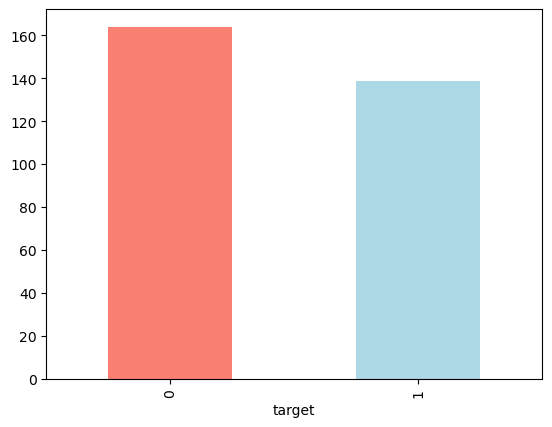

In [8]:
df['target'].value_counts().plot(kind='bar',color=['salmon','lightblue']);

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
# Are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Heart Disease frequency according to SEX

In [11]:
df.sex.value_counts() # 1 = Male, 0 = Female 

sex
1    206
0     97
Name: count, dtype: int64

In [12]:
# Compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,72,92
1,25,114


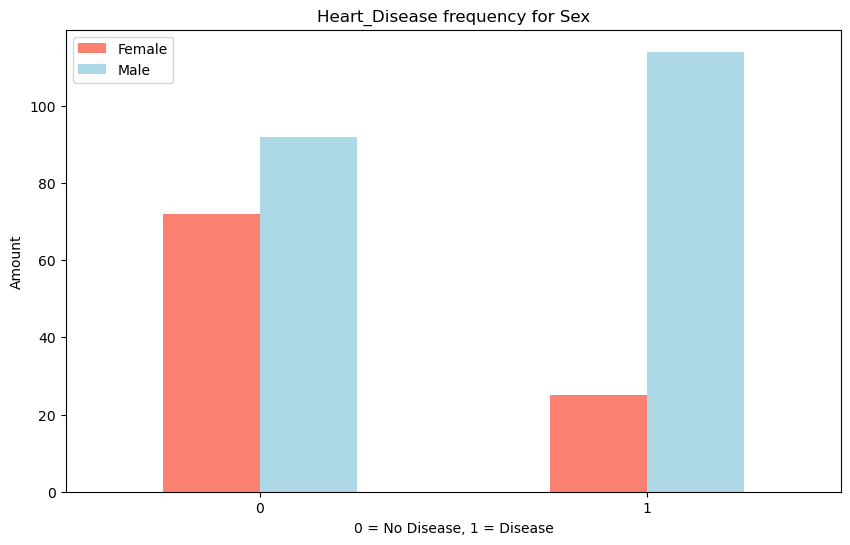

In [13]:
# Creating a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind='bar',
                                  figsize=(10,6),
                                  color=['salmon','lightblue']);
plt.title('Heart_Disease frequency for Sex')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female','Male'])
plt.xticks(rotation=0);

In [14]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
47,50,1,3,150,243,0,2,128,0,2.6,1,0,3,1
125,45,0,1,130,234,0,2,175,0,0.6,1,0,1,0
10,57,1,3,140,192,0,0,148,0,0.4,1,0,2,0
105,54,1,1,108,309,0,0,156,0,0.0,0,0,3,0
39,61,1,2,150,243,1,0,137,1,1.0,1,0,1,0


In [15]:
df['thalach'].value_counts() # has 91 different values, shown in the output => length = 91

thalach
162    11
160     9
163     9
152     8
150     7
       ..
177     1
127     1
97      1
190     1
90      1
Name: count, Length: 91, dtype: int64

#### Age vs Max. Heart Rate

In [16]:
df.age[df.target==1]

1      67
2      67
6      62
8      63
9      53
       ..
297    57
298    45
299    68
300    57
301    57
Name: age, Length: 139, dtype: int64

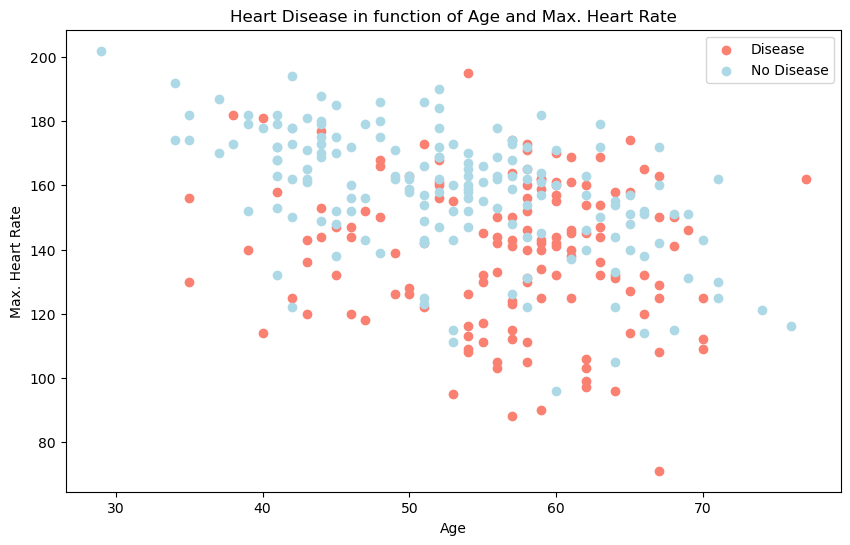

In [17]:
# Creating another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target == 1],
           df.thalach[df.target==1],
           c='salmon');

# Scatter with negative examples
plt.scatter(df.age[df.target == 0],
           df.thalach[df.target==0],
           c='lightblue');

# Add some helpful info
plt.title('Heart Disease in function of Age and Max. Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max. Heart Rate')
plt.legend(['Disease','No Disease']);

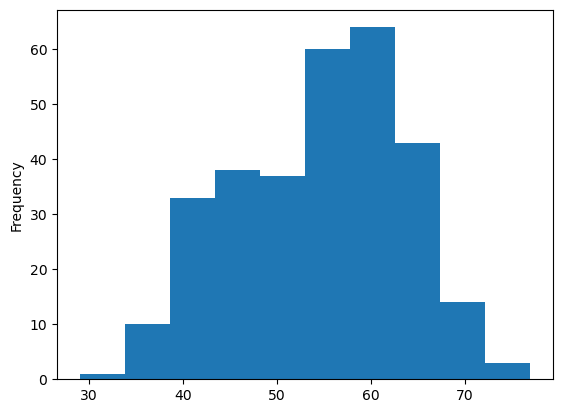

In [18]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

#### Heart Disease frequency as per Chest Pain Type
Angina is chest pain or discomfort that occurs when the heart muscle doesn't get enough oxygen-rich blood.
- 0 typical angina
- 1 atypical angina : Chest pain not related to heart
- 2 non- anginal pain : Typically esophageal spasms (Non heart related)
- 3 asymptomatic (Nominal) : Chest pain not showing signs of disease 

In [19]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,16,7
1,41,9
2,68,18
3,39,105


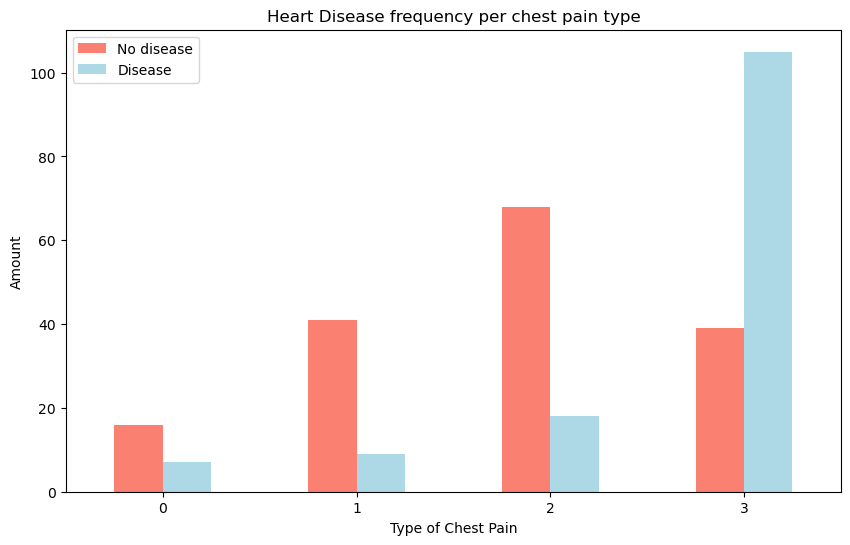

In [20]:
# Making crosstab more vizual
pd.crosstab(df.cp,df.target).plot(kind='bar',
                                 figsize=(10,6),
                                 color=['salmon','lightblue']);
# Add some more detailing
plt.title('Heart Disease frequency per chest pain type')
plt.xlabel('Type of Chest Pain')
plt.ylabel('Amount')
plt.legend(['No disease','Disease'])
plt.xticks(rotation=0);

#### Building a correlation matrix

In [21]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.365323,0.122300,0.223120
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.086048,0.367911,0.276816
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233117,0.259835,0.414446
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.097528,0.126879,0.150825
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.123726,0.030438,0.085164
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.140764,0.054164,0.025264
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.131749,0.019115,0.169202
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.265699,-0.257980,-0.417167
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145788,0.321680,0.431894
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.301067,0.333925,0.424510


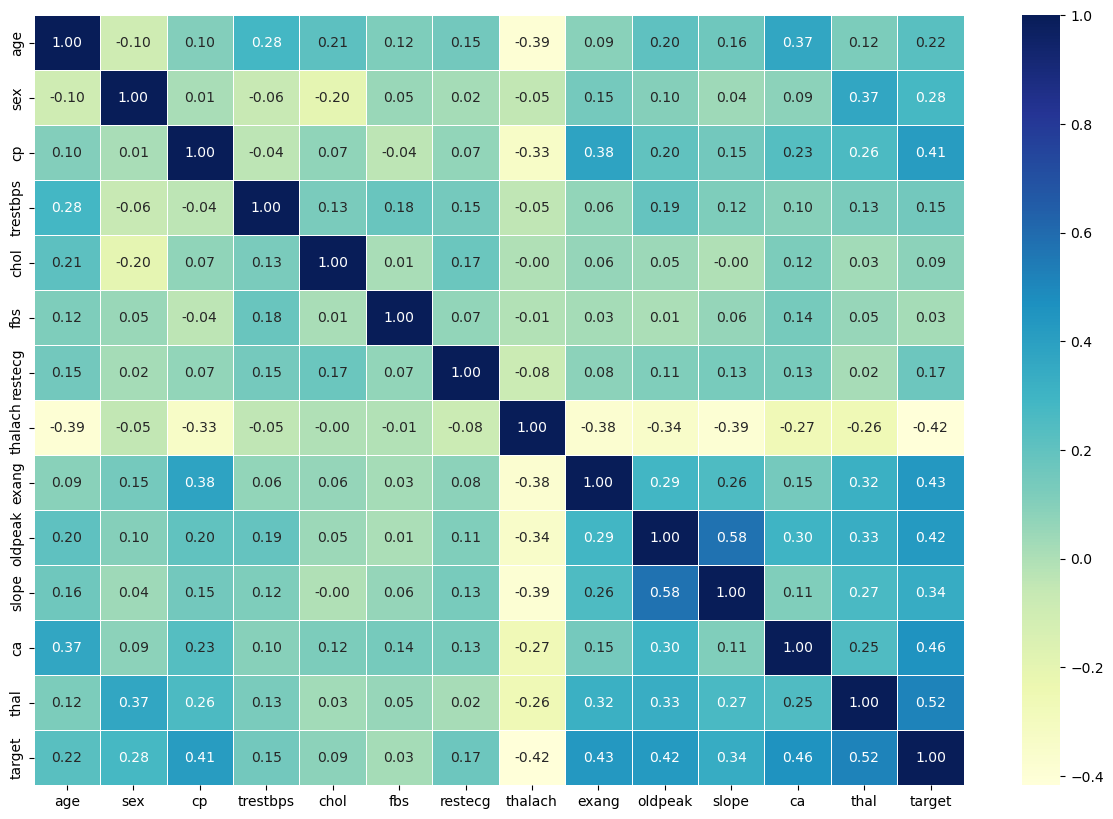

In [22]:
# Let's make our correlation matrix prettier
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap='YlGnBu');

In [23]:
sns.__version__

'0.13.2'

#### Modelling 

In [24]:
# Split data into X and y
X = df.drop('target',axis=1)
y = df['target']

In [25]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1


In [26]:
y.head()

0    0
1    1
2    1
3    0
4    0
Name: target, dtype: int64

In [27]:
# Split data into train and test sets
np.random.seed(42)

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [28]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,29,1,1,130,204,0,2,202,0,0.0,0,0,1
202,57,1,2,150,126,1,0,173,0,0.2,0,1,3
196,69,1,0,160,234,1,2,131,0,0.1,1,1,1
75,65,0,2,160,360,0,2,151,0,0.8,0,0,1
176,52,1,3,108,233,1,0,147,0,0.1,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,54,1,1,192,283,0,2,195,0,0.0,0,1,3
71,67,1,3,125,254,1,0,163,0,0.2,1,2,3
106,59,1,3,140,177,0,0,162,1,0.0,0,1,3
270,61,1,3,140,207,0,2,138,1,1.9,0,1,3


In [29]:
y_train

132    0
202    0
196    0
75     0
176    0
      ..
188    1
71     1
106    1
270    1
102    0
Name: target, Length: 242, dtype: int64

Now the data has been split, it's time to build a machine learning model

We'll train it (find the patterns) on the training data set,

And we'll test it (use the patterns) on the test data set.

- Which model should I choose? 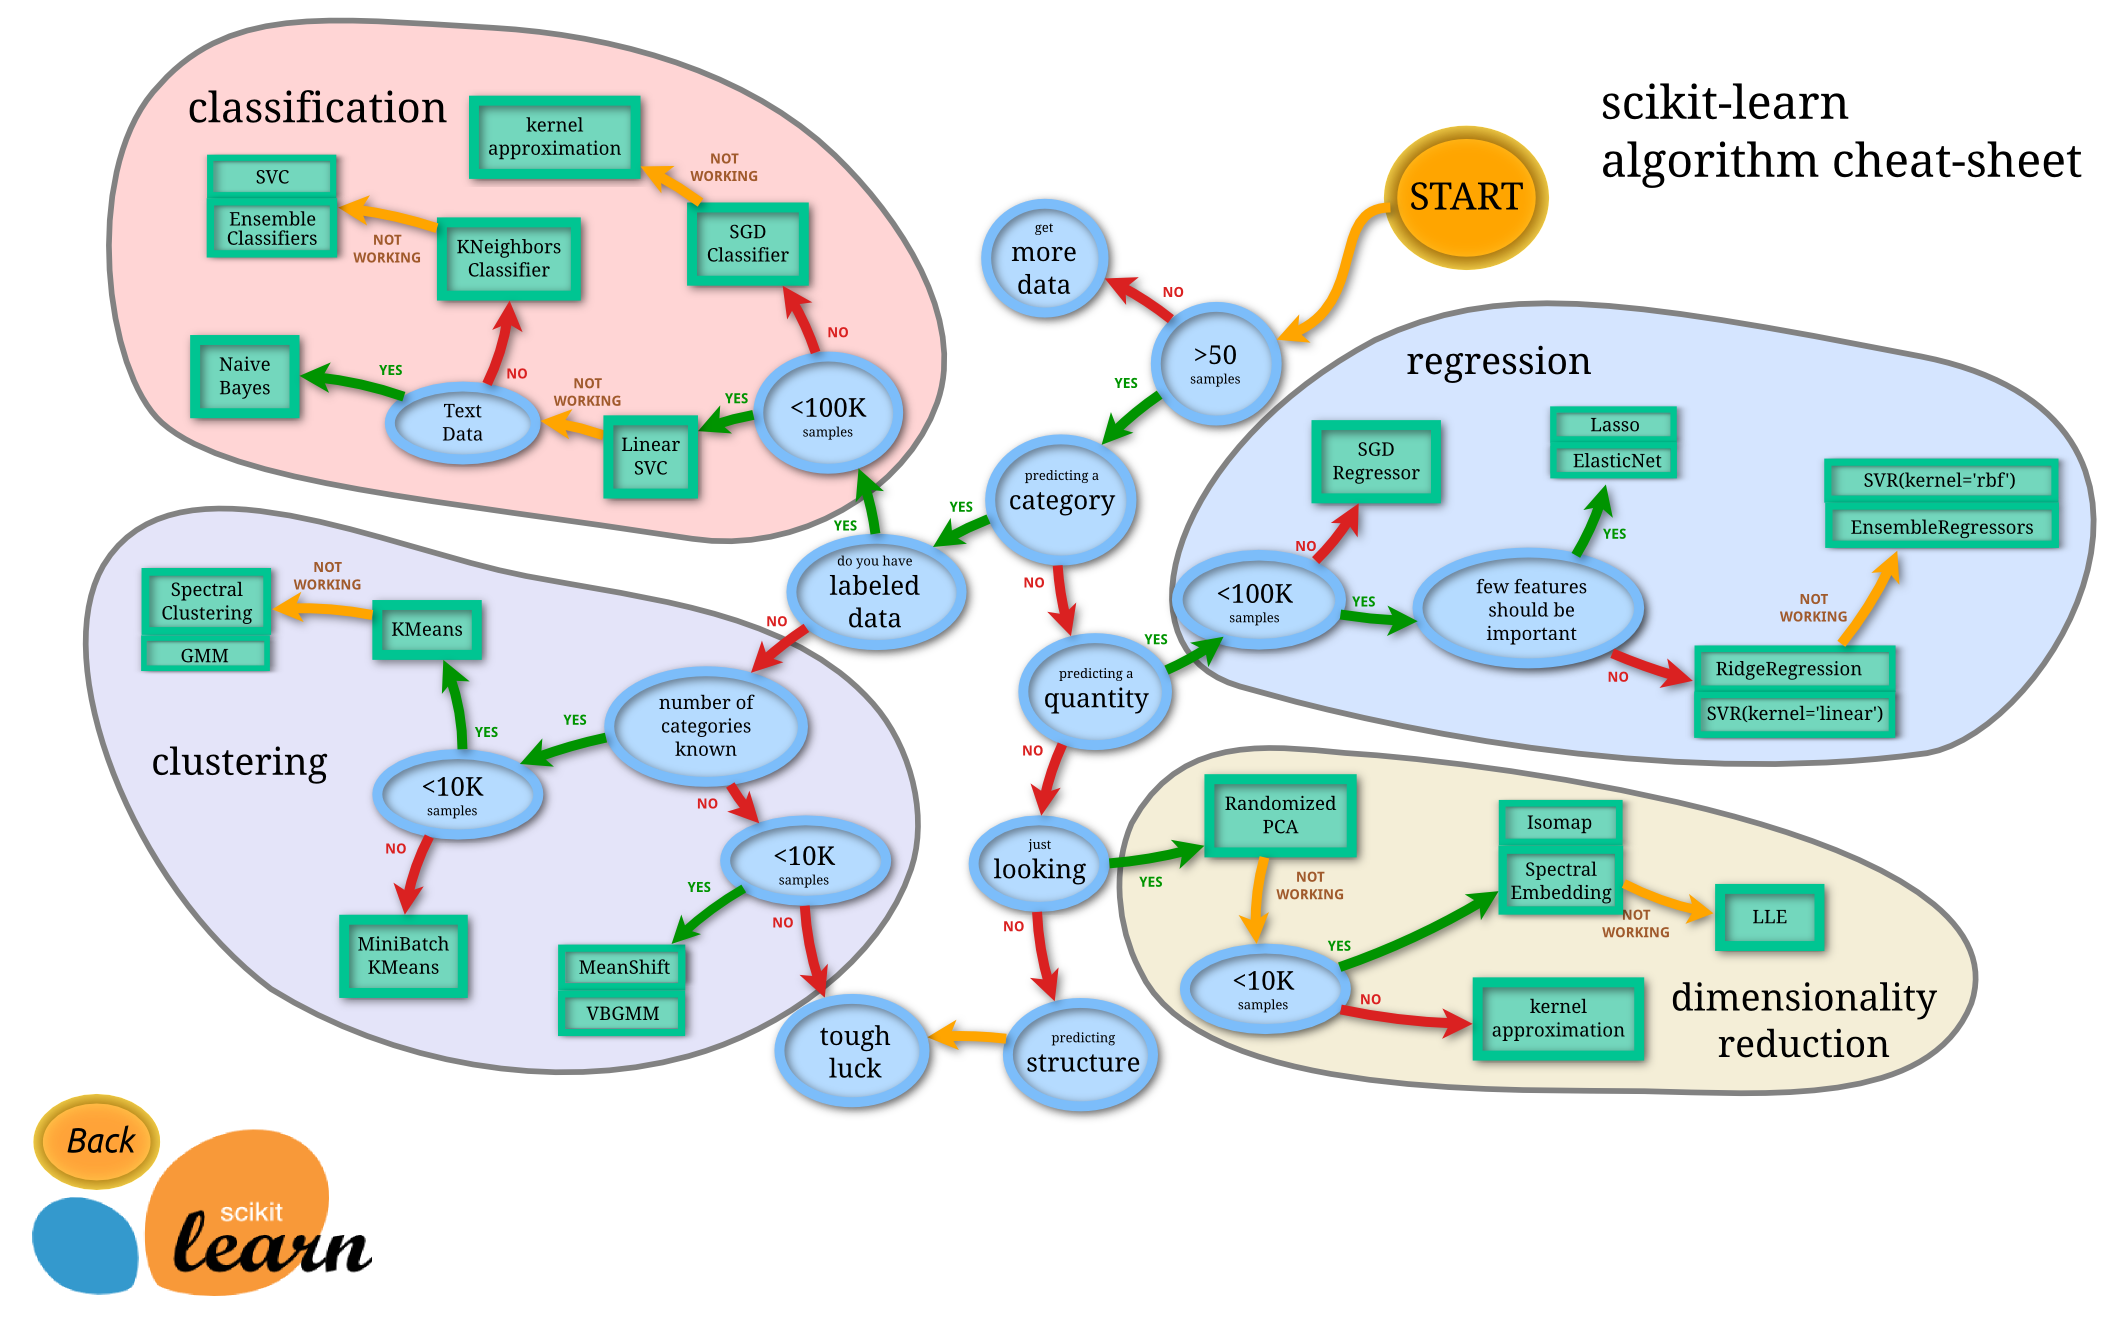

We're going to try:
- Logistic Regression (Got this from search on Google: ML models used for classification problems) `Despite its name, it is implemented as a linear model for classification rather than regression` (https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)
- K-Nearest Neighbours Classifier
- Random Forest Classifier 

In [30]:
# Put models in a dictionary
models = {'Logistic Regression':LogisticRegression(solver='lbfgs', max_iter=1000),
         'KNN':KNeighborsClassifier(),
         'Random Forest': RandomForestClassifier()}

# Creating a function to fit and score models
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
        Fit and evaluates a given Machine Learning model.
        models: A dictionary of different Scikit-Learn Machine learning models
        X_train : Training data (no labels)
        X_test : Testing data (no labels)
        y_train : Training labels
        y_test : Test labels
    """
    # Set random seed
    np.random.seed(42)

    # Make a dictionary to keep model scores
    model_scores={}

    # Loop through models
    for name, model in models.items():
        model.fit(X_train,y_train) # Fitting the model to the data
        model_scores[name]=model.score(X_test,y_test) # Evaluation of model and appending it's score to model_score
    return model_scores

In [31]:
model_scores = fit_and_score(models = models,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)

In [32]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6557377049180327,
 'Random Forest': 0.8688524590163934}

#### Model Comparison 

In [33]:
model_compare = pd.DataFrame(model_scores,index=['accuracy'])

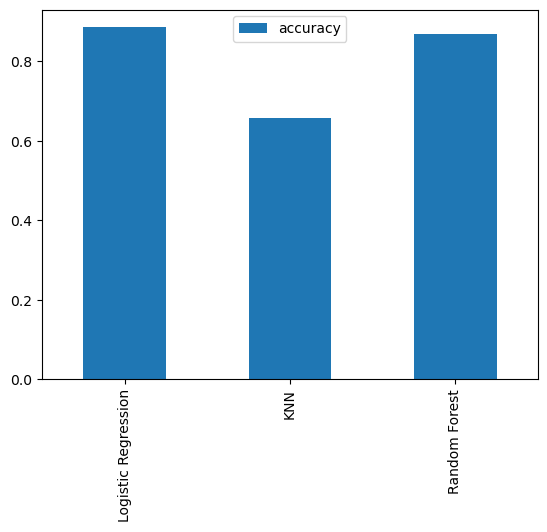

In [34]:
model_compare.T.plot.bar();

#### Classification Model Evaluation Metrics
1. Accuracy
2. Area under ROC Curve
3. Confusion Matrix
4. Classification Report

- Let's look at the following:
  - Hyperparameter tuning
  - Feature importance
  - Confusion matrix
  - Cross-validation
  - Precision
  - Recall
  - F1 Score
  - Classification report
  - ROC Curve
  - Area under ROC Curve

#### Hyperparameter tuning by hand

In [35]:
# Let's tune KNN

train_score = []
test_score = []

# Create a list of different values for n_neighbours 
neighbours = range(1,21)

# Setup the KNN Instance
knn = KNeighborsClassifier()

# Loop through different n_neighbours 
for i in neighbours:
    knn.set_params(n_neighbors = i)
    # Fit the algorithm 
    knn.fit(X_train,y_train)
    # Update the training scores list
    train_score.append(knn.score(X_train,y_train))
    # Update the test scores list
    test_score.append(knn.score(X_test,y_test))

In [36]:
train_score

[1.0,
 0.78099173553719,
 0.7603305785123967,
 0.7603305785123967,
 0.7479338842975206,
 0.7231404958677686,
 0.7231404958677686,
 0.7107438016528925,
 0.7024793388429752,
 0.6818181818181818,
 0.7066115702479339,
 0.7107438016528925,
 0.6859504132231405,
 0.6900826446280992,
 0.6694214876033058,
 0.6776859504132231,
 0.6735537190082644,
 0.6859504132231405,
 0.6942148760330579,
 0.6942148760330579]

In [37]:
test_score

[0.6065573770491803,
 0.5901639344262295,
 0.639344262295082,
 0.6065573770491803,
 0.6557377049180327,
 0.6721311475409836,
 0.7213114754098361,
 0.6721311475409836,
 0.7213114754098361,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.6885245901639344,
 0.6721311475409836,
 0.7213114754098361,
 0.6885245901639344]

Maximum KNN Score on the test data = 72.13%


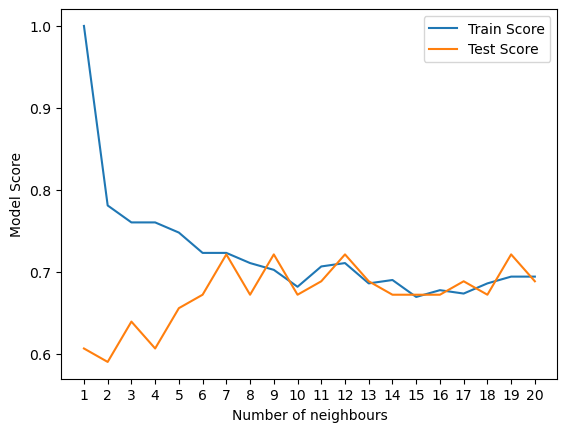

In [38]:
plt.plot(neighbours,train_score,label='Train Score')
plt.plot(neighbours,test_score,label='Test Score')
plt.xlabel('Number of neighbours')
plt.ylabel('Model Score')
plt.xticks(np.arange(1,21,1))
plt.legend()

print(f"Maximum KNN Score on the test data = {max(test_score)*100:.2f}%")

#### GridSearchCV vs RandomSearchCV
CV = Cross Validation
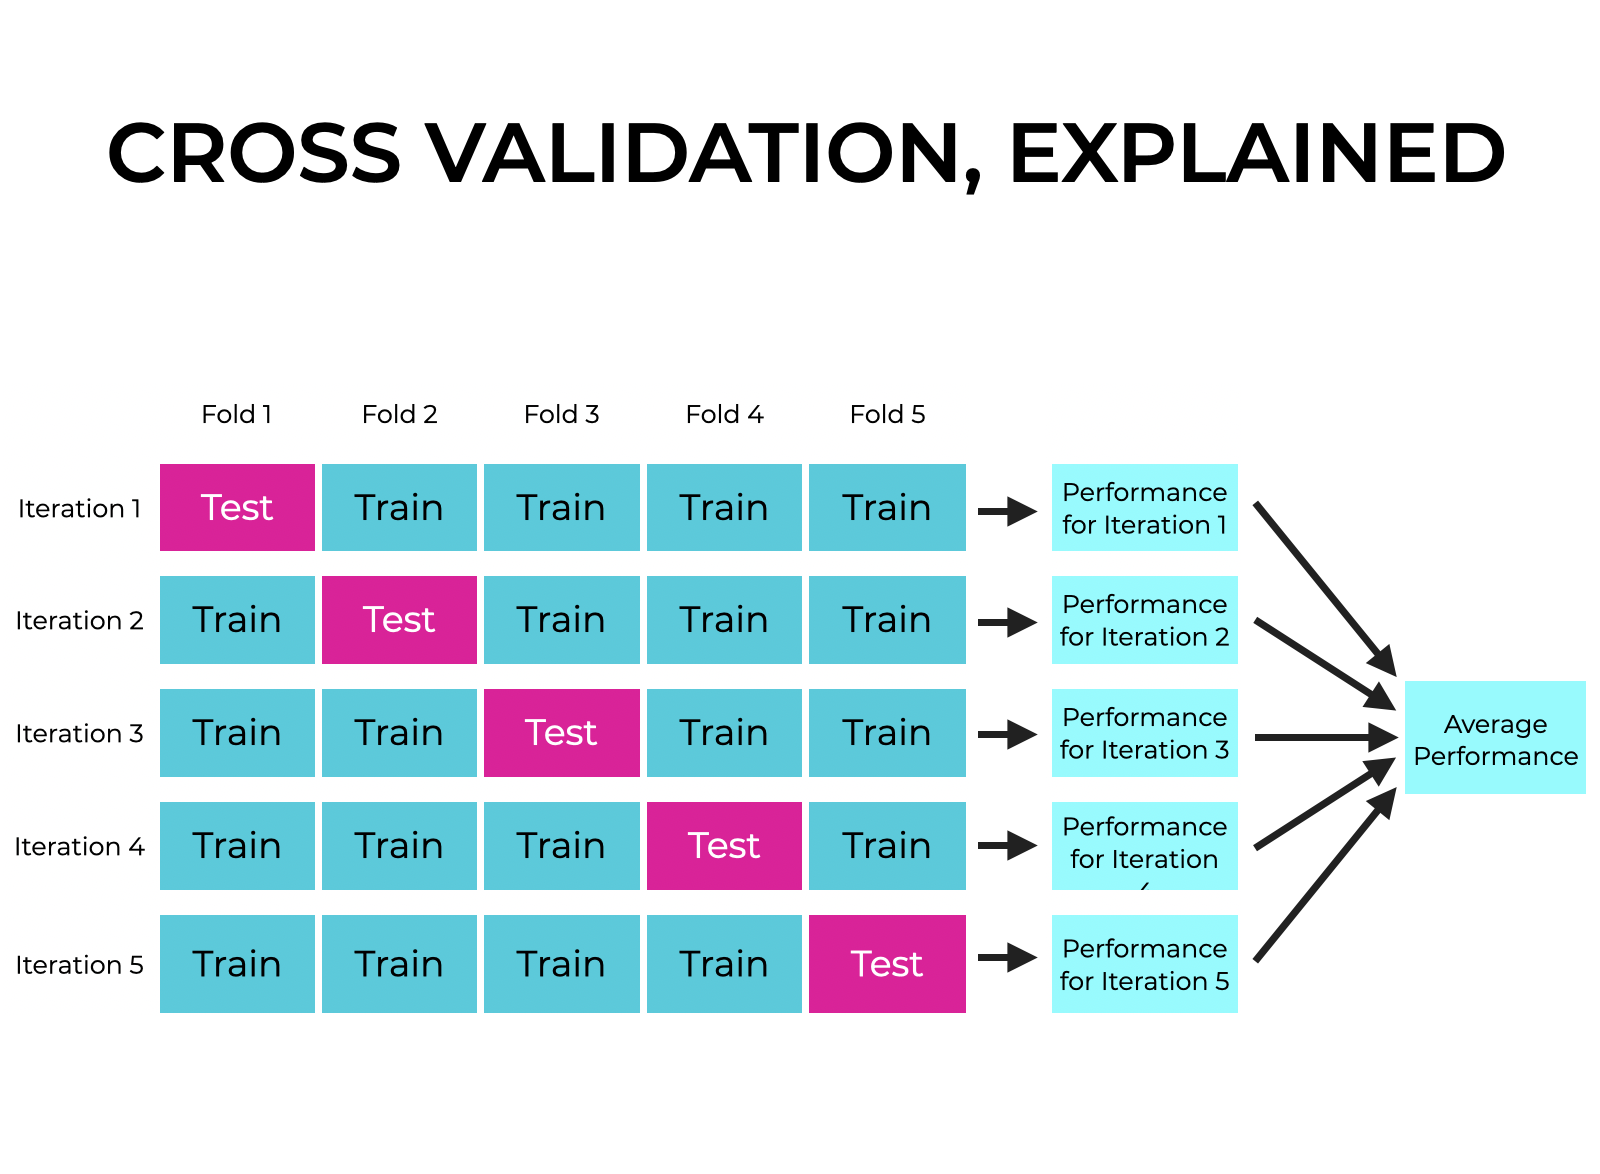
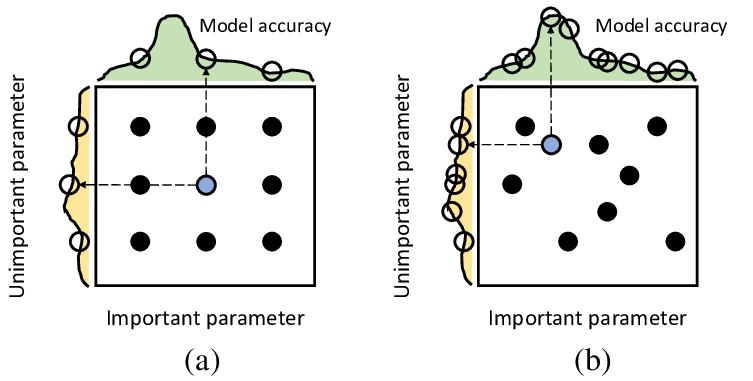

`Verbose` is used to set the logging level during the model training and validation process. The verbose argument can take one of three integers:
1. verbose = 0 : Silent Mode - No output during training
2. verbose = 1 : Progress Bar Mode - Displays a progress bar with training and validation metrics (default)
3. verbose = 2 : One line per epoch : Shows a summary of training and validation metrics after each epoch.

#### Hyperparameter tuning with RandomizedSearchCV
Google : How to tune a logistic regression machine learning model in python?

We're going to tune:
* LogisticRegression( )
* RandomForestClassifier( )

using RandomizedSearchCV (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

In [39]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {'C':np.logspace(-4,4,20),
               'solver':['liblinear']}

# Create hyperparameter grid for RandomForestClassifier
rf_grid = {'n_estimators':np.arange(10,1000,50), # It is highly recommended to use continuous distributions for continuous parameters.
          'max_depth':[None,3,5,10],
          'min_samples_split':np.arange(2,20,2),
          'min_samples_leaf':np.arange(1,20,3)}

In [40]:
np.logspace(-4,4,20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

We have now hyperparameter grid setup for each of our models, let's tune them using RandomizedSearchCV

In [41]:
# Tune the LogisticRegression
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,
                               cv=5,n_iter=20, verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [42]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [43]:
rs_log_reg.score(X_test,y_test)

0.9016393442622951

In [44]:
# Let's do for RandomForestClassifier
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,
                               cv=5,n_iter=20, verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  4,  7, 10, 13, 16, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [45]:
rs_rf.best_params_

{'n_estimators': 610,
 'min_samples_split': 18,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [46]:
rs_rf.score(X_test,y_test)

0.9016393442622951

In [47]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6557377049180327,
 'Random Forest': 0.8688524590163934}

#### Hyperparameter tuning with GridSearchCV
Logistic Regression model provides the best score so far, let's try and improve it using GridSearchCV

In [48]:
# Different parameters for Logistic Regression Model
log_reg_grid = {'C':np.logspace(-4,4,30),
               'solver':['liblinear']}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,
                               cv=5,verbose=True)

# Fit random hyperparameter search model for LogisticRegression
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [49]:
gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [51]:
gs_log_reg.score(X_test,y_test)

0.9016393442622951

#### Evaluating our tuned ML classifier, beyond accuracy
- ROC curve and AUC score
- Confusion matrix
- Classification report
- Precision
- Recall
- F1-score
  
and it would be great if cross-validation was used where possible

To make comparisons and evaluate our trained model, we first need to make predictions.

In [52]:
# Making prediction
y_preds = gs_log_reg.predict(X_test)
y_preds

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

In [53]:
y_test

179    0
228    1
111    1
246    1
60     1
      ..
249    0
104    1
300    1
193    1
184    1
Name: target, Length: 61, dtype: int64

#### ROC Curve
- It plots the true positive rate (TPR) against the false positive rate (FPR).
- Used to visualize the difference between normal and abnormal test results.
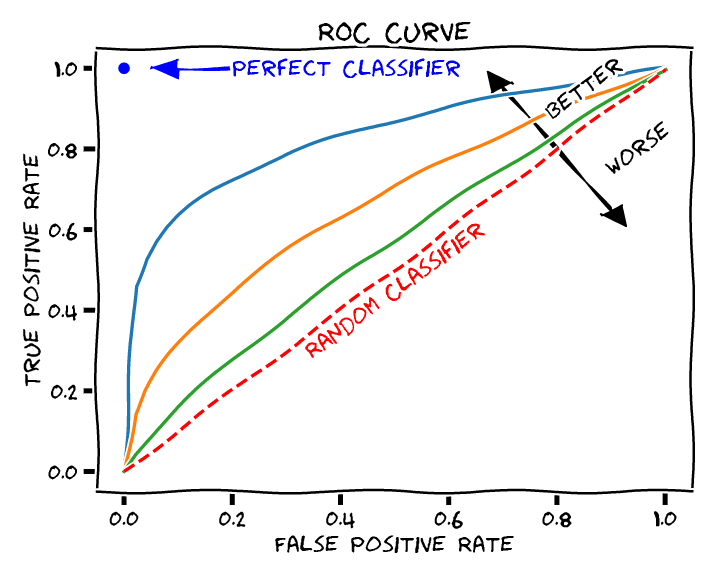
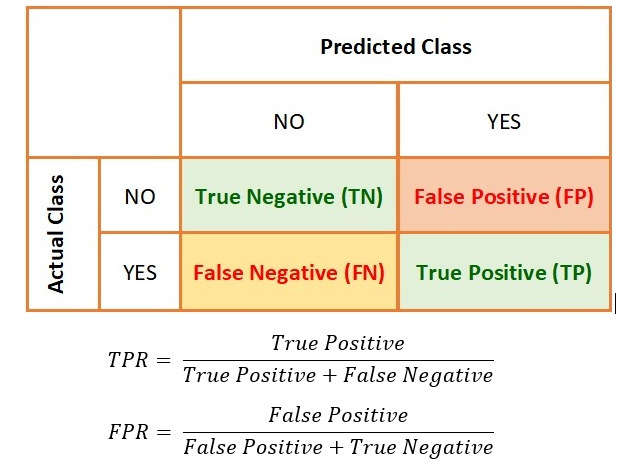

**specificity** (= false positive fraction = FP/(FP+TN)) -> x-axis

**sensitivity** (= true positive fraction = TP/(TP+FN)) -> y-axis

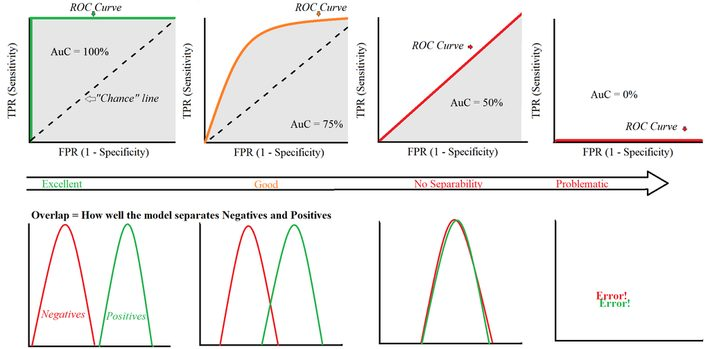


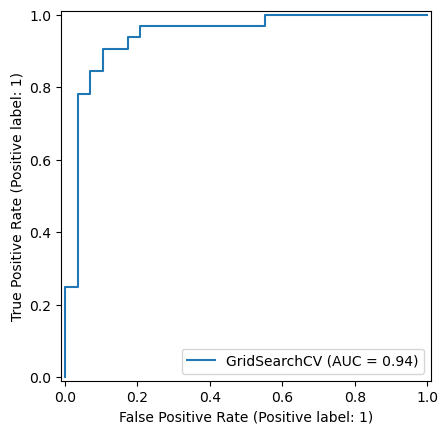

In [62]:
# plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg,X_test,y_test);

In [63]:
# Confusion matrix
print(confusion_matrix(y_test,y_preds))

[[26  3]
 [ 3 29]]


In [66]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test, y_preds):
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

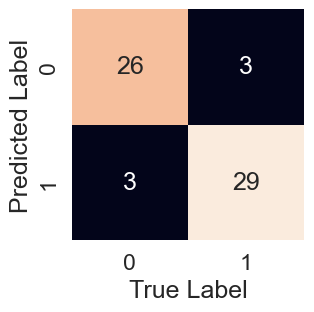

In [67]:
plot_conf_mat(y_test,y_preds)

Let's get a classification report as well as cross-validated precision, recall and F1-score 

In [68]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



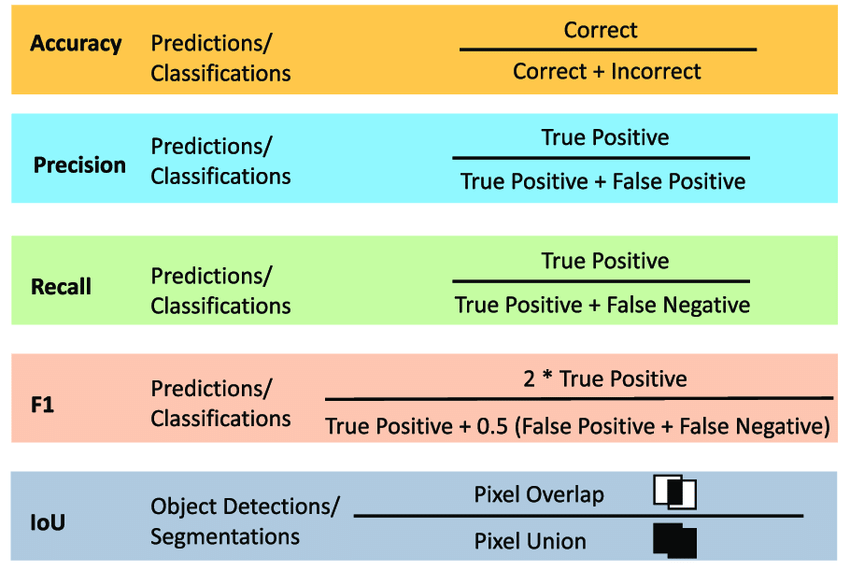

#### Calculate evaluation metrics using cross-validation
We're going to calculate precision, recall and F1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`

In [69]:
# Check best hyperparameter
gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [70]:
# Create a new classifier with the best parameters
clf = LogisticRegression(C=0.38566204211634725,solver="liblinear")

In [71]:
# Cross-validated accuracy, precision, recall, f1-score
cv_acc = cross_val_score(clf,X,y,cv=5,scoring='accuracy')
cv_acc

array([0.86885246, 0.85245902, 0.78688525, 0.81666667, 0.8       ])

In [73]:
cv_acc= np.mean(cv_acc)
cv_acc

0.8249726775956283

In [74]:
cv_precision = cross_val_score(clf,X,y,cv=5,scoring='precision')
cv_precision

array([0.91666667, 0.80645161, 0.74193548, 0.86363636, 0.86363636])

In [75]:
cv_precision= np.mean(cv_precision)
cv_precision

0.8384652981427175

In [77]:
cv_recall = cross_val_score(clf,X,y,cv=5,scoring='recall')
cv_recall= np.mean(cv_recall)
cv_recall

0.7764550264550264

In [78]:
cv_f1 = cross_val_score(clf,X,y,cv=5,scoring='f1')
cv_f1= np.mean(cv_f1)
cv_f1

0.8017565388606551

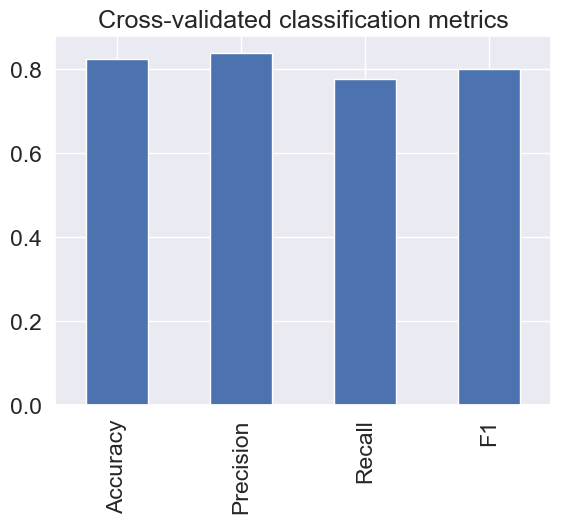

In [81]:
# Visualize
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                          "Precision":cv_precision,
                          "Recall":cv_recall,
                          "F1":cv_f1},
                         index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics", legend=False);

#### Feature Importance
Feature importance is another way of asking "Which features contributed most to the outcomes of the model and how did they contribute?"

**Finding feature importance is different for each machine learning model** (Google it!!)

In [82]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [83]:
gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [84]:
clf = LogisticRegression(C=0.38566204211634725,solver="liblinear")

In [86]:
clf.fit(X_train,y_train);

In [87]:
# Check coef_
clf.coef_

array([[-0.02851564,  0.78336235,  0.35685085,  0.01016581,  0.00484734,
        -0.2625504 ,  0.1587292 , -0.03116791,  0.56624388,  0.32390085,
         0.35277236,  1.1267513 ,  0.56897314]])

In [91]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [88]:
# Match coef's of features to columns
features_dict = dict(zip(df.columns,list(clf.coef_[0])))
features_dict

{'age': -0.02851564382776655,
 'sex': 0.7833623511976868,
 'cp': 0.356850854105819,
 'trestbps': 0.010165813790210835,
 'chol': 0.00484734077211865,
 'fbs': -0.26255040244448313,
 'restecg': 0.15872920307119798,
 'thalach': -0.031167910360705348,
 'exang': 0.5662438771054555,
 'oldpeak': 0.32390084914519524,
 'slope': 0.3527723562126064,
 'ca': 1.126751303896728,
 'thal': 0.5689731357689287}

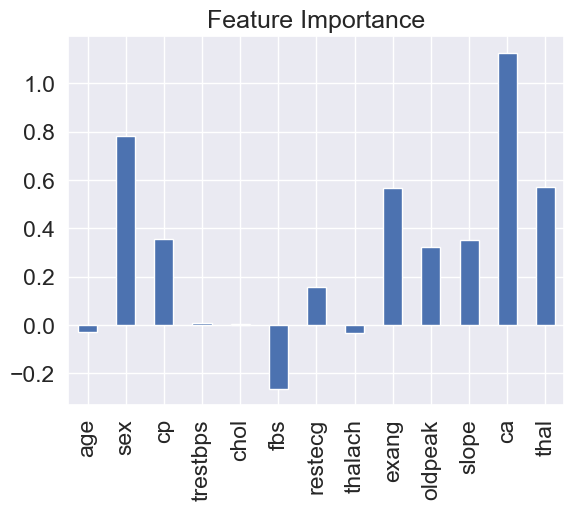

In [92]:
# Visualize feature importance
feature_df = pd.DataFrame(features_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [93]:
pd.crosstab(df.fbs,df.target)

target,0,1
fbs,,
0,141,117
1,23,22


In [94]:
pd.crosstab(df["ca"],df["target"])

target,0,1
ca,,
0,133,47
1,21,44
2,7,31
3,3,17
